# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 6) Training on 70% of a specific hospital plus same absolute number of all other hospitals

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_19620\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [8]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [9]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [10]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'icu', 'region', 'state'],
      dtype='object')

In [11]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

In [12]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [13]:
import ipywidgets as widgets
from IPython.display import clear_output

In [14]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [15]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [16]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [17]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [18]:
# !pip install ipywidgets

In [19]:
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [23]:
display(dropdown_hospital)

Dropdown(index=1, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

**Filter all hospitals except the selected above**

In [24]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1500, 26)

In [27]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(1500, 25)

In [28]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(1500,)

In [29]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [30]:
X_train_specific.shape

(1050, 25)

In [31]:
X_test_specific.shape

(450, 25)

**Filter same absolute number of specific hospital from all hospitals**

PS: Also removed GHC hospital due to very low positive cases

In [32]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[ (~df_all_hospitals.index.isin(X_specific.index)) & 
                                                     (df_all_hospitals.city_hospital != 'GHC_02')]

#Then, sample all hospital data with same absolute number as specific train data
df_iacov_model_lean = df_all_hospitals_except_specific.sample(X_train_specific.shape[0], random_state=42)
df_iacov_model_lean.shape

(1050, 26)

In [33]:
#check data without specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPPORTUGUES_SALVADOR        325
CEARA_UNIMED                  206
HMV_POA_02                    111
HRL_2021_02                   108
RIO_DE_JANEIRO_UNIMED          99
HOSPSANTAJULIA_MANAUS          55
HOSPSANTACATARINABLUMENAU      37
PERNAMBUCO_FULL                29
HOSPSAOFRANCISCO_MOGIGUACU     26
PELOTAS                        18
CEARA_HUWC                     14
AMAZONAS_HUGV                  12
HEVV                           10
Name: count, dtype: int64

**Append 70% data of specific hospital**

In [34]:
df_iacov_model_lean = pd.concat([df_iacov_model_lean, X_train_specific], axis=0)
df_iacov_model_lean.shape

(2100, 26)

In [35]:
#Check after apending data of specific hospital
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1050
HOSPPORTUGUES_SALVADOR         325
CEARA_UNIMED                   206
HMV_POA_02                     111
HRL_2021_02                    108
RIO_DE_JANEIRO_UNIMED           99
HOSPSANTAJULIA_MANAUS           55
HOSPSANTACATARINABLUMENAU       37
PERNAMBUCO_FULL                 29
HOSPSAOFRANCISCO_MOGIGUACU      26
PELOTAS                         18
CEARA_HUWC                      14
AMAZONAS_HUGV                   12
HEVV                            10
Name: count, dtype: int64

In [36]:
print("Specific: " + specific_hospital )
print("(training - all regions - same absolute number) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: HC_USP
(training - all regions - same absolute number) dataset: (2100, 26)

(training - specific) dataset: (1050, 25)

(test - specific) dataset: (450, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [37]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(2100, 25)

In [38]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
0.000    1698
1.000     402
Name: count, dtype: int64

In [39]:
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
0.000   80.857
1.000   19.143
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [40]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [41]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [42]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,87,0,float64,-0.125,2100.000,58.333,17.253,18.000,45.000,59.000,71.000,105.000
male,0,0.000,2,969,float64,-0.155,2100.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,201,9.571,135,0,float64,0.615,1899.000,86.481,18.269,13.000,74.000,85.000,97.500,191.000
resp_rate,356,16.952,51,1,float64,2.125,1744.000,22.790,6.539,0.000,18.000,21.000,26.000,97.000
sys_press,320,15.238,144,0,float64,-0.348,1780.000,122.326,23.022,10.000,110.000,120.000,136.000,214.000
dias_press,317,15.095,119,0,float64,-0.201,1783.000,73.248,14.905,6.000,64.000,73.000,80.000,131.000
mean_press,327,15.571,895,77,float64,-1.852,1773.000,85.150,24.399,0.000,77.654,89.000,98.000,153.000
temp,283,13.476,83,1,float64,41.121,1817.000,36.541,7.966,0.000,35.900,36.300,36.900,372.000
hemoglobin,1030,49.048,147,0,float64,-0.663,1070.000,12.648,2.208,3.300,11.400,13.000,14.075,19.000
platelets,201,9.571,613,0,float64,0.506,1899.000,239390.796,130429.151,25.000,157000.000,220000.000,309500.000,826600.000


In [43]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [44]:
#Check mean_press missing after recalculating
#column_summaries(df_iacov_model_lean)

In [45]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [46]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [47]:
x_test_specific_name = 'X_test_all_regions_abs_number_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_all_regions_abs_number_SUDESTE_SP_HC_USP.csv'

In [48]:
y_test_specific_name = 'y_icu_all_regions_abs_number_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_all_regions_abs_number_SUDESTE_SP_HC_USP.csv'

In [49]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(450, 25)

In [50]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(450,)

## 2.2) Prepare Experiment 

### All hospitals except specific

In [51]:
df_iacov_model_lean.shape

(2100, 25)

In [52]:
df_iacov_model_train = df_iacov_model_lean

In [53]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [54]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 471 to 1864
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2100 non-null   float64
 1   male             2100 non-null   float64
 2   heart_rate       1899 non-null   float64
 3   resp_rate        1744 non-null   float64
 4   sys_press        1780 non-null   float64
 5   dias_press       1783 non-null   float64
 6   mean_press       1859 non-null   float64
 7   temp             1817 non-null   float64
 8   hemoglobin       1070 non-null   float64
 9   platelets        1899 non-null   float64
 10  hematocrit       972 non-null    float64
 11  red_cells_count  786 non-null    float64
 12  hcm              1782 non-null   float64
 13  rdw              1783 non-null   float64
 14  mcv              1785 non-null   float64
 15  leukocytes       1899 non-null   float64
 16  neutrophil       1594 non-null   float64
 17  lymphocytes      

In [55]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2100, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [57]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [58]:
X_train.shape

(2376, 22)

In [59]:
X_test.shape

(631, 22)

In [60]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [61]:
seed

42

In [62]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [63]:
# print(inspect.getsource(compare_models))

In [64]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.964200,0.996600,0.994100,0.934300,0.938500,0.965400,0.928400,0.065000,0.257500,0.895200
1,Extreme Gradient Boosting,0.960800,0.995500,0.992400,0.929200,0.934100,0.962200,0.921700,0.128600,0.300300,0.886200
2,CatBoost Classifier,0.955800,0.994200,0.990700,0.920900,0.926600,0.957400,0.911600,0.222300,0.176200,0.873200


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [65]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.937,0.999,0.992,0.882,0.894,0.940,0.874,0.006,0.523,0.855
1,0.962,0.997,0.992,0.933,0.936,0.963,0.924,0.282,0.877,0.884
2,0.975,1.000,1.000,0.950,0.952,0.975,0.950,0.154,0.127,0.924
3,0.971,0.998,0.992,0.950,0.952,0.971,0.941,0.056,0.990,0.884
4,0.971,1.000,1.000,0.941,0.944,0.971,0.941,0.047,0.523,0.902
5,0.983,1.000,1.000,0.966,0.968,0.984,0.966,0.050,0.108,0.932
6,0.949,1.000,1.000,0.899,0.908,0.952,0.899,0.004,0.836,0.880
7,0.979,0.998,1.000,0.958,0.959,0.979,0.958,0.133,0.078,0.934
8,0.962,0.998,0.983,0.941,0.944,0.963,0.924,0.211,0.992,0.890
9,0.971,0.999,0.992,0.949,0.952,0.971,0.941,0.073,0.492,0.893


In [66]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.937,0.998,0.992,0.882,0.894,0.940,0.874,0.000,0.000,0.787
1,0.954,0.994,0.992,0.916,0.922,0.956,0.908,0.000,0.000,0.869
2,0.971,1.000,1.000,0.941,0.944,0.971,0.941,0.001,0.001,0.893
3,0.950,0.997,0.992,0.908,0.915,0.952,0.899,0.000,0.000,0.851
4,0.950,1.000,1.000,0.899,0.908,0.952,0.899,0.003,0.000,0.860
5,0.975,0.998,1.000,0.950,0.952,0.975,0.950,0.001,0.018,0.905
6,0.924,1.000,1.000,0.849,0.868,0.929,0.848,0.000,0.000,0.758
7,0.966,0.992,0.992,0.941,0.944,0.967,0.932,0.000,0.102,0.902
8,0.949,0.999,1.000,0.898,0.908,0.952,0.899,0.000,0.000,0.834
9,0.962,0.998,1.000,0.924,0.930,0.964,0.924,0.000,0.000,0.856


In [67]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.937,0.986,0.992,0.882,0.894,0.940,0.874,0.255,0.986,0.800
1,0.958,0.989,0.975,0.941,0.943,0.959,0.916,0.917,0.212,0.864
2,0.971,0.997,1.000,0.941,0.944,0.971,0.941,0.217,0.026,0.913
3,0.958,0.990,0.992,0.924,0.929,0.959,0.916,0.139,0.100,0.876
4,0.958,0.987,1.000,0.916,0.922,0.960,0.916,0.327,0.645,0.848
5,0.962,0.991,0.983,0.941,0.944,0.963,0.924,0.418,0.105,0.891
6,0.941,0.993,1.000,0.882,0.894,0.944,0.882,0.015,0.481,0.834
7,0.958,0.989,0.975,0.941,0.943,0.958,0.916,0.072,0.090,0.886
8,0.945,0.993,0.992,0.898,0.908,0.948,0.890,0.225,0.995,0.846
9,0.966,0.989,0.992,0.941,0.944,0.967,0.932,0.492,0.226,0.879


### Select best algorithm based on AUC in predicts

In [68]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.887,0.951,0.653,0.943,0.732,0.690,0.622,0.051,0.001,0.530


In [69]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.891,0.951,0.785,0.916,0.688,0.734,0.665,0.000,0.000,0.462


In [70]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.894,0.954,0.777,0.922,0.702,0.737,0.671,0.061,0.004,0.540


In [71]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
#preds = preds_lgb
preds = preds_xgb

### Best model

In [72]:
npv(y_test, preds['Label'])

0.9456740442655935

In [73]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.94', '0.97']

,,
,,
Ground Truth Prevalence,. . .,0.192
Test set Prevalence,. . .,0.212
True positive rate (recall),. . .,0.777
False positive rate,. . .,0.078
Positive predictive value (precision),. . .,0.701
True negative rate (specificity),. . .,0.922
False negative rate,. . .,0.223
Negative predictive value,. . .,0.946
Positive likelihood ratio (bigger is better),. . .,9.905


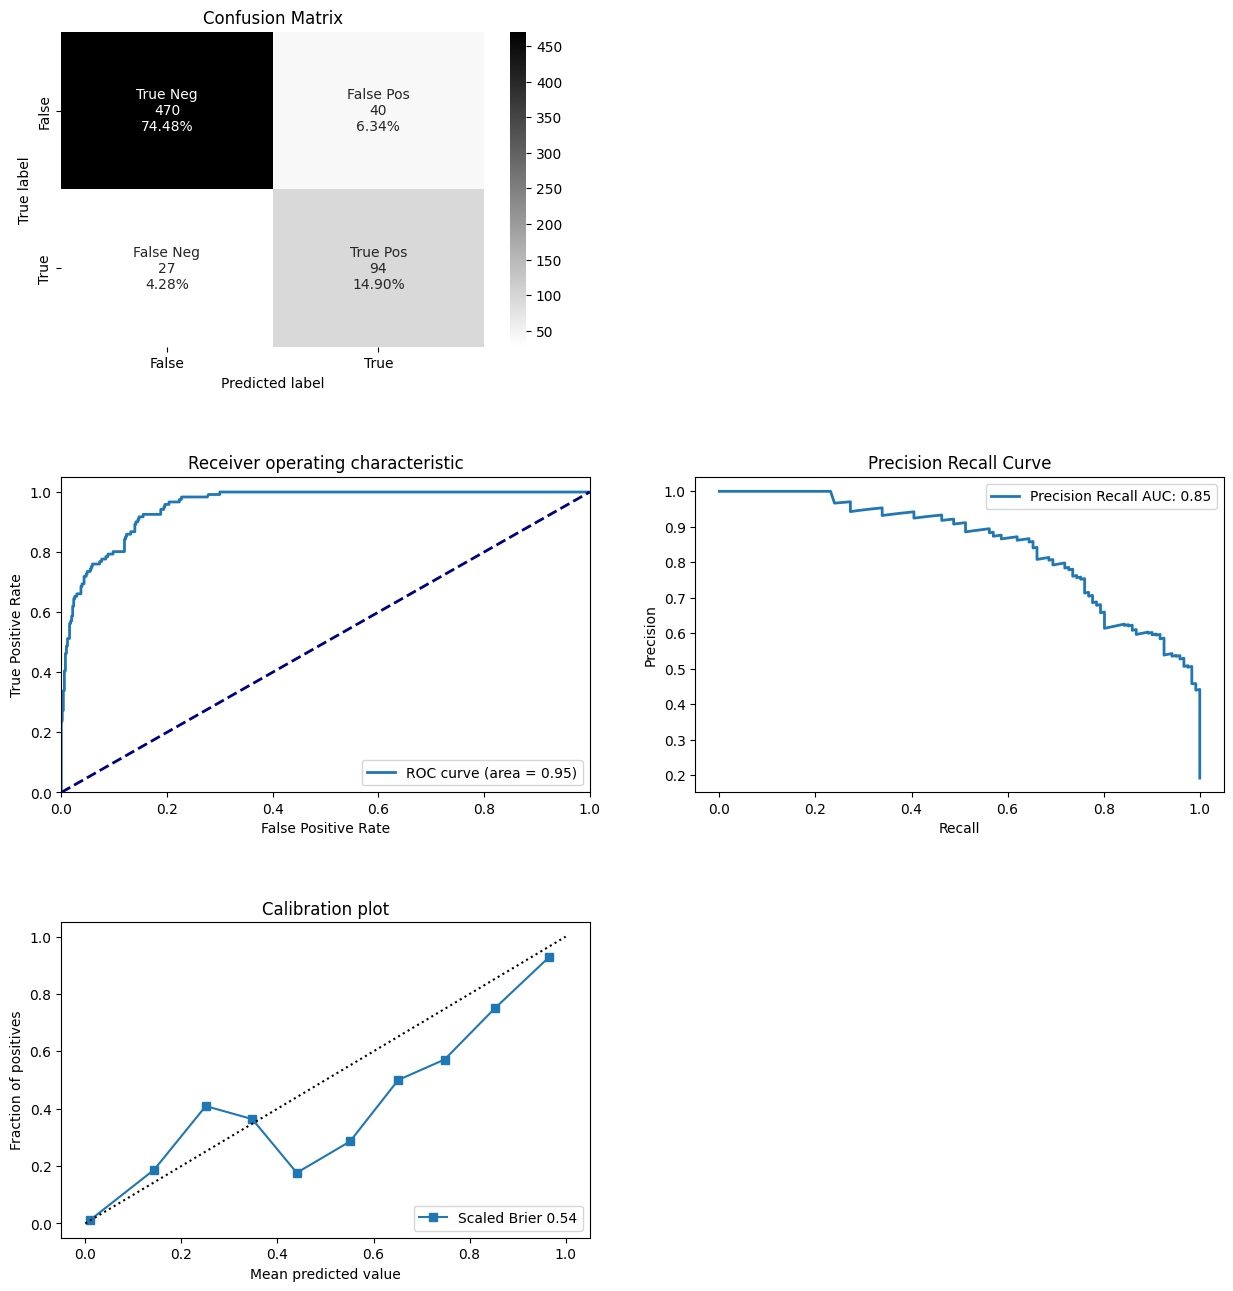

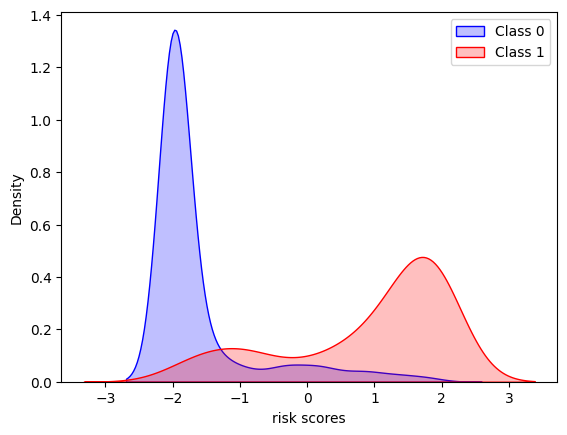

,,
,,
Ground Truth Prevalence,. . .,0.192
Test set Prevalence,. . .,0.212
True positive rate (recall),. . .,0.777
False positive rate,. . .,0.078
Positive predictive value (precision),. . .,0.701
True negative rate (specificity),. . .,0.922
False negative rate,. . .,0.223
Negative predictive value,. . .,0.946
Positive likelihood ratio (bigger is better),. . .,9.905


In [74]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [75]:
#evaluate_model(lgbmtuned)

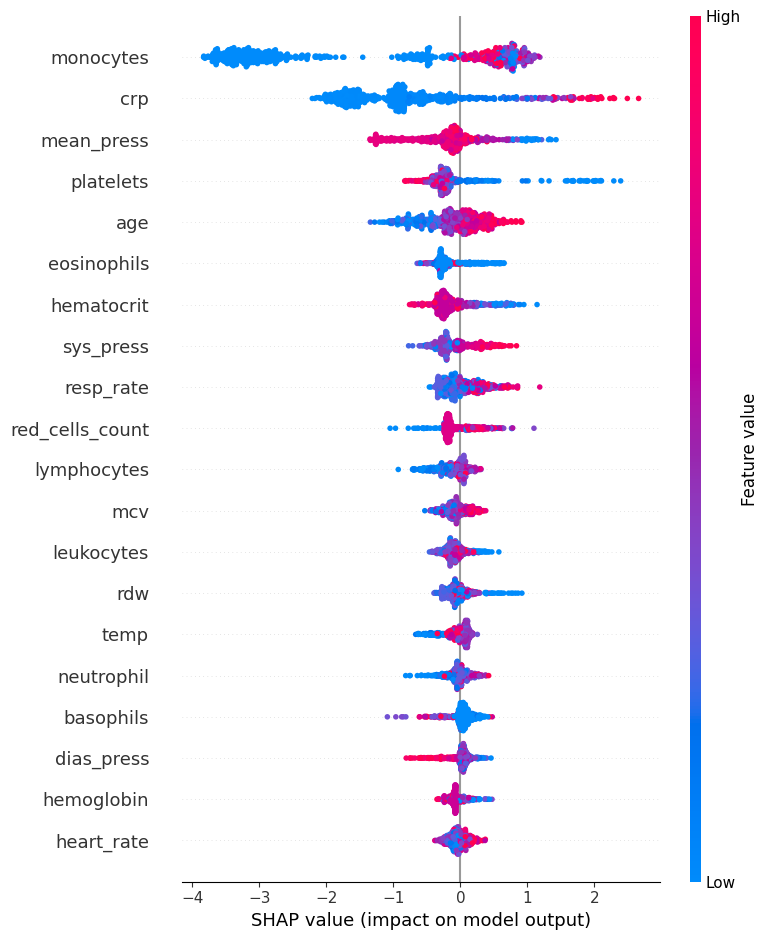

In [76]:
#interpret_model(cattuned)
#interpret_model(lgbmtuned)
interpret_model(xgbtuned)

In [77]:
#plot_model(lgbmtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [78]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

In [79]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [80]:
final_model_name = str(final_model.__class__.__name__) + '_all_regions_abs_number_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'XGBClassifier_all_regions_abs_number_SUDESTE_SP_HC_USP'

In [81]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [82]:
#final_model.get_all_params()
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.55, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.295, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=275, n_jobs=-2,
              num_parallel_tree=None, random_state=42, ...)

# Use the saved model to predict on specific hospital
## ALL_REGIONS_ABS_NUMBER

In [83]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)
all_regions_abs_number_model_pkl = final_model_name + ".pkl"
prep_pipe_all_regions_abs_number, all_regions_abs_number_model = joblib.load(all_regions_abs_number_model_pkl)

loaded: XGBClassifier_all_regions_abs_number_SUDESTE_SP_HC_USP


In [84]:
all_regions_abs_number_model.__class__.__name__

'XGBClassifier'

In [85]:
x_test_specific_name

'X_test_all_regions_abs_number_SUDESTE_SP_HC_USP.csv'

In [86]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(450, 25)

In [87]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [88]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(450,)

In [89]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
2326,HC_USP,71.000,0.000,70.000,25.000,97.000,52.000,66.985,36.500,11.000,311000.000,35.000,NaN,27.700,13.900,87.300,15670.000,14180.000,1110.000,0.010,NaN,0.370,1.492,SUDESTE,SP
1933,HC_USP,21.000,0.000,106.000,22.000,117.000,71.000,86.318,36.000,NaN,159000.000,NaN,NaN,29.300,13.400,83.600,8980.000,8350.000,270.000,0.090,NaN,0.270,2.664,SUDESTE,SP
1267,HC_USP,49.000,1.000,79.000,36.000,103.000,61.000,74.986,37.700,NaN,337000.000,NaN,NaN,28.500,14.600,87.500,8410.000,6810.000,1220.000,0.010,NaN,0.370,3.107,SUDESTE,SP
1877,HC_USP,52.000,0.000,141.000,25.000,166.000,102.000,123.312,37.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
1031,HC_USP,75.000,1.000,74.000,28.000,120.000,70.000,86.650,33.600,NaN,117000.000,NaN,NaN,29.700,15.700,83.400,8110.000,7100.000,470.000,0.000,NaN,0.540,NaN,SUDESTE,SP


In [90]:
X_test_single["class"] = y_test_single

In [91]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [92]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [93]:
X_test_single_transformed = prep_pipe_all_regions_abs_number.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


,class,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,monocytes,crp,male_1.0
2326,1,0.759,-0.942,0.092,-0.994,-1.440,-1.348,0.117,-2.736,0.798,-1.915,-0.524,-0.112,0.213,0.328,1.378,0.362,-0.108,-0.249,0.044,0.000
1933,1,-2.268,1.067,-0.278,-0.127,-0.109,-0.120,-0.425,-0.020,-0.656,-0.068,0.182,-0.351,-0.374,-0.054,0.143,-1.314,0.481,-0.413,1.208,0.000
1267,1,-0.573,-0.440,1.449,-0.734,-0.810,-0.840,1.417,-0.020,1.047,-0.068,-0.171,0.222,0.245,-0.087,-0.184,0.582,-0.108,-0.249,1.648,1.000
1877,1,-0.391,3.020,0.092,1.997,2.062,2.230,1.092,-0.020,-0.206,-0.068,0.006,-0.208,-0.041,-0.091,-0.183,-0.216,-0.108,-0.191,-0.213,0.000
1031,1,1.001,-0.719,0.462,0.003,-0.179,-0.099,-3.027,-0.020,-1.058,-0.068,0.359,0.747,-0.406,-0.104,-0.122,-0.915,-0.182,0.030,-0.213,1.000


In [94]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [95]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [96]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

In [97]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [98]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['eosinophils', 'male_0.0', 'red_cells_count']

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [99]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [100]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [101]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'eosinophils', 'male_0.0', 'red_cells_count'],
      dtype='object')

In [102]:
X_test_single_transformed.shape

(450, 22)

In [103]:
X_test_single_transformed.shape

(450, 22)

In [104]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [105]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'eosinophils', 'male_0.0', 'red_cells_count'],
      dtype='object')

**Reorder columns**

In [106]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(450, 22)

0.6818565005620083


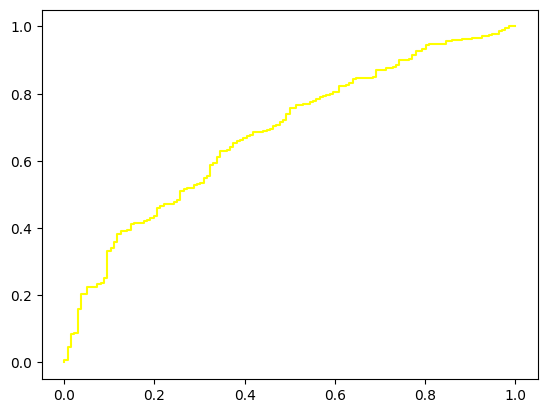

In [107]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_regions_abs_number_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best model - AUC " +  str(auc_ind), color="yellow")

In [108]:
y_pred_prob1.shape

(450,)

In [109]:
y_pred = all_regions_abs_number_model.predict(X_test_single_transformed)

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.296
True positive rate (recall),. . .,0.373
False positive rate,. . .,0.118
Positive predictive value (precision),. . .,0.880
True negative rate (specificity),. . .,0.882
False negative rate,. . .,0.627
Negative predictive value,. . .,0.379
Positive likelihood ratio (bigger is better),. . .,3.167


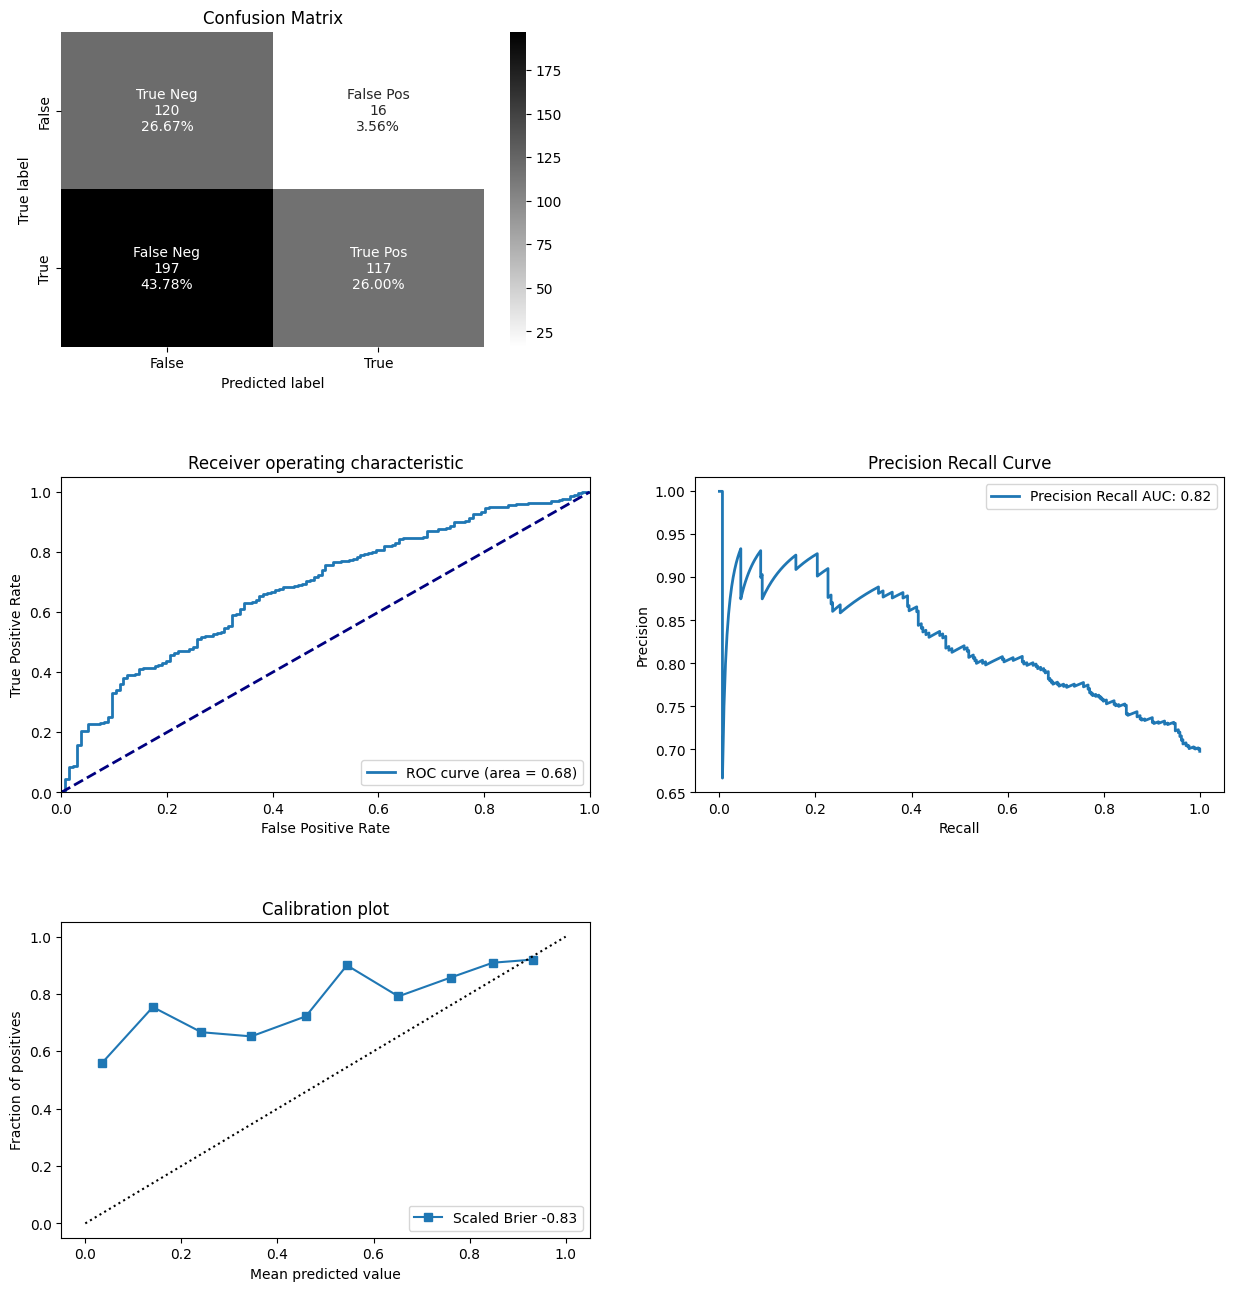

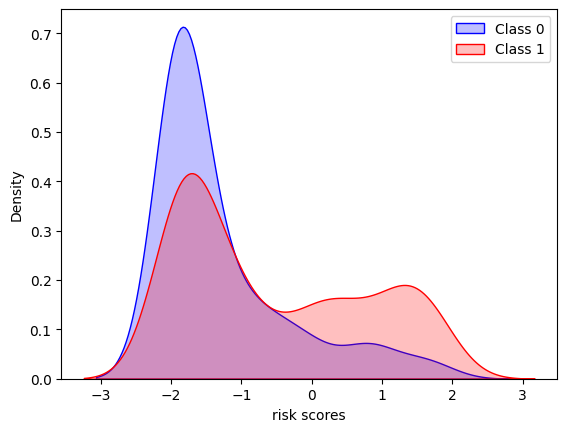

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.296
True positive rate (recall),. . .,0.373
False positive rate,. . .,0.118
Positive predictive value (precision),. . .,0.880
True negative rate (specificity),. . .,0.882
False negative rate,. . .,0.627
Negative predictive value,. . .,0.379
Positive likelihood ratio (bigger is better),. . .,3.167


In [110]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [111]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6818565005620083

In [112]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.63', '0.73']

In [113]:
#recall
tpr(y_test_single, y_pred)

0.37261146496815284

In [114]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.8823529411764706

In [115]:
#accuracy
accuracy(y_test_single, y_pred)

0.5266666666666666

In [116]:
ppv(y_test_single, y_pred)

0.8796992481203008

In [117]:
npv(y_test_single, y_pred)

0.3785488958990536

# End of File